<a href="https://colab.research.google.com/github/rachel1234561/ds2002project/blob/main/analysis_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizations & Analysis**
### The first section uses college scorecard data, which is organized by institution and other variables.
### The second part uses American Community Survey data, which describes median earnings based on education.
###In the final section, the datasets are analyzed together.

### **College Scorecard(Institution-Level)**

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotnine import *
from pymongo import MongoClient

In [ ]:
!git clone https://github.com/rachel1234561/ds2002project.git

Cloning into 'ds2002project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 128.11 KiB | 1001.00 KiB/s, done.


In [20]:
#Load data from MongoDB
client = MongoClient("mongodb+srv://<user>:<db_password>@cluster1.xvd5b.mongodb.net/?retryWrites=true&w=majority&appName=Cluster1")
db = client['DS2002']
data = db['college_data']

In [21]:
#Convert dictionaries to dataframe
data=pd.DataFrame(list(data.find()))
data=data.drop('_id',axis=1)
data.head()

,id,name,zip,city,state,acceptance_rate,part_time,debt,deg_type,pell_grant,...,percent_loans,graduation_rate,yearly_cost,student_pop,earnings,school_type,region,average_act,precent_female,average_income
0,100654,Alabama A & M University,35762,Normal,AL,0.6840,0.0778,31000,3,0.6553,...,0.5365,0.2678,23167.0,5196.0,46562.0,Public,5,18.0,0.5640301318,32362.826114
1,100663,University of Alabama at Birmingham,35294-0110,Birmingham,AL,0.8668,0.1986,22300,3,0.3374,...,0.4214,0.6442,26257.0,12776.0,52404.0,Public,5,27.0,0.6390907397,51306.674306
2,100690,Amridge University,36117-3553,Montgomery,AL,NaN,0.4342,32189,3,0.7769,...,0.5896,0.5000,NaN,228.0,45765.0,Private Nonprofit,5,NaN,0.6486486486,21079.472973
3,100706,University of Alabama in Huntsville,35899,Huntsville,AL,0.7810,0.1612,20705,3,0.2235,...,0.3511,0.6295,25777.0,6985.0,67695.0,Public,5,28.0,0.4763499372,61096.588949
4,100724,Alabama State University,36104-0271,Montgomery,AL,0.9660,0.0771,31000,3,0.6984,...,0.768,0.2773,21900.0,3296.0,37551.0,Public,5,18.0,0.6134185304,31684.382188


In [22]:
data=data.drop('deg_type',axis=1)
variables = data.columns.tolist()
variables

['id',
 'name',
 'zip',
 'city',
 'state',
 'acceptance_rate',
 'part_time',
 'debt',
 'pell_grant',
 'stud_fac_ratio',
 'percent_loans',
 'graduation_rate',
 'yearly_cost',
 'student_pop',
 'earnings',
 'school_type',
 'region',
 'average_act',
 'precent_female',
 'average_income']

In [ ]:
#Make sure all numeric variables are type float or int
data['debt'] = pd.to_numeric(data['debt'], errors='coerce')
data['precent_female'] = pd.to_numeric(data['precent_female'], errors='coerce')
data['average_income'] = pd.to_numeric(data['average_income'], errors='coerce')
data['pell_grant'] = pd.to_numeric(data['pell_grant'], errors='coerce')
data['percent_loans'] = pd.to_numeric(data['percent_loans'], errors='coerce')

In [ ]:
#Calculate descriptive stats
data.drop(['id','region'],axis=1).describe()

,acceptance_rate,part_time,debt,pell_grant,stud_fac_ratio,percent_loans,graduation_rate,yearly_cost,student_pop,earnings,average_act,precent_female,average_income
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.717484,0.100461,22761.260870,0.333373,13.451087,0.508555,0.604222,41583.395652,5657.089130,52851.789130,24.454348,0.577558,71462.595719
std,0.216348,0.099641,3697.293296,0.133075,3.947947,0.172664,0.168634,18658.341704,7855.280847,12732.627084,4.146145,0.104655,23821.067151
min,0.032400,0.000000,3591.000000,0.068900,5.000000,0.025600,0.040000,9380.000000,125.000000,23825.000000,14.000000,0.126126,21952.625348
25%,0.632550,0.025400,20500.000000,0.230825,11.000000,0.399500,0.482975,24722.250000,1235.750000,45055.250000,21.000000,0.526542,53413.962522
50%,0.765150,0.065850,23193.000000,0.325300,13.000000,0.502050,0.600500,39570.500000,2513.500000,50118.500000,24.000000,0.581005,67188.493094
75%,0.872400,0.144225,25642.750000,0.413550,16.000000,0.629325,0.721950,54210.500000,6594.500000,57631.000000,27.000000,0.633681,86128.405183
max,1.000000,0.610000,36500.000000,0.833200,54.000000,0.944100,0.978100,84126.000000,57874.000000,139346.000000,35.000000,0.979567,145228.221830


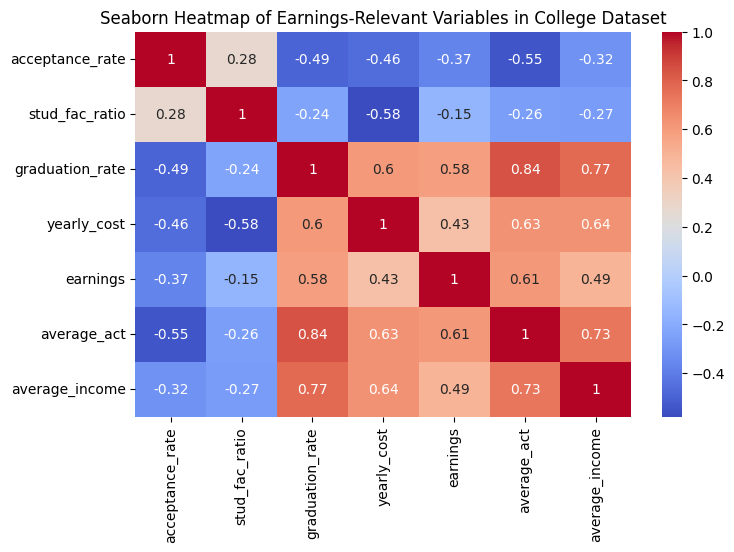

In [ ]:
# Compute the correlation matrix using only numeric columns
numeric_vars = data.select_dtypes(include=['float64', 'int64']).drop(['region','id','part_time','pell_grant','precent_female','percent_loans','debt','student_pop'],axis='columns')
correlation_matrix = numeric_vars.corr()

# Create a heatmap to assess relationship between earnings and other factors
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Seaborn Heatmap of Earnings-Relevant Variables in College Dataset')
plt.show()

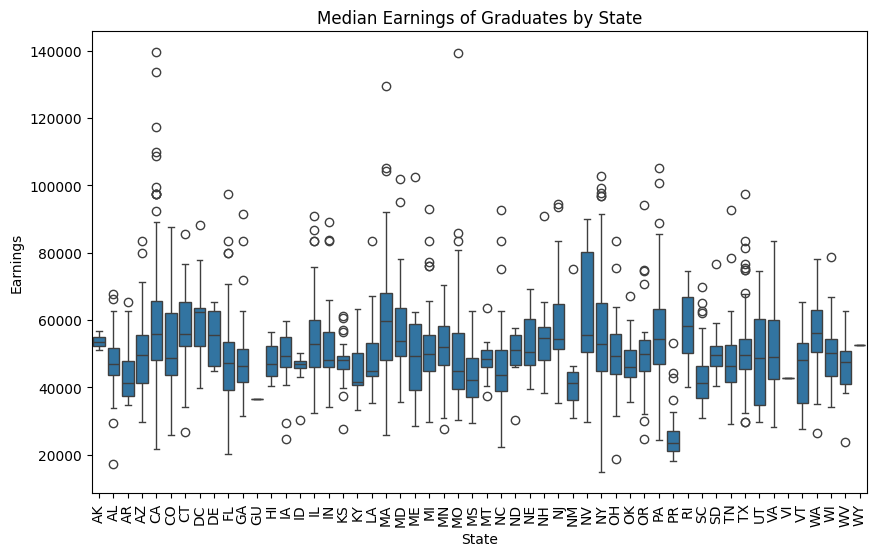

In [ ]:
# Create a box plot to compare median graduate earnings by state
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='earnings', data=data.sort_values(by='state'))
plt.title('Median Earnings of Graduates by State')
plt.xlabel('State')
plt.ylabel('Earnings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

### **American Community Survey(State-Level)**

In [23]:
#Load data from MongoDB
client = MongoClient("mongodb+srv://<user>:<db_password>@cluster1.xvd5b.mongodb.net/?retryWrites=true&w=majority&appName=Cluster1")
db = client['DS2002']
earnings_edu = db['state_data']

In [24]:
#Convert dictionaries to dataframe
earnings_edu=pd.DataFrame(list(earnings_edu.find()))

In [26]:
earnings_edu=earnings_edu.drop('_id',axis=1)
earnings_edu.head()

,State,MedianEarnings,Less_than_highschool,Highschool,Some_college_Associates,Bachelors,Graduates_Professional
0,Alabama,43016,27789,34470,39855,57347,71030
1,Alaska,54606,30804,41338,52261,66719,87052
2,Arizona,46574,30398,36792,43812,61392,78782
3,Arkansas,41013,29018,34070,38116,54457,70376
4,California,51947,29750,38446,46575,75306,105279


In [ ]:
#Calculate descriptive stats
earnings_edu.describe()

,MedianEarnings,Less_than_highschool,Highschool,Some_college_Associates,Bachelors,Graduates_Professional
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,48559.557692,30302.576923,37211.826923,43358.884615,61451.326923,79424.269231
std,8195.940756,3724.982449,4119.480382,4975.392666,9298.244040,12961.111983
min,21198.000000,12135.000000,16442.000000,19395.000000,27844.000000,39102.000000
25%,44048.250000,28879.000000,35122.500000,40647.000000,56745.500000,71319.500000
50%,47275.500000,30830.500000,37018.000000,43645.000000,59323.500000,76751.000000
75%,52174.250000,33103.250000,39832.000000,46471.750000,66924.750000,86244.000000
max,83447.000000,35724.000000,44342.000000,52261.000000,86371.000000,117089.000000


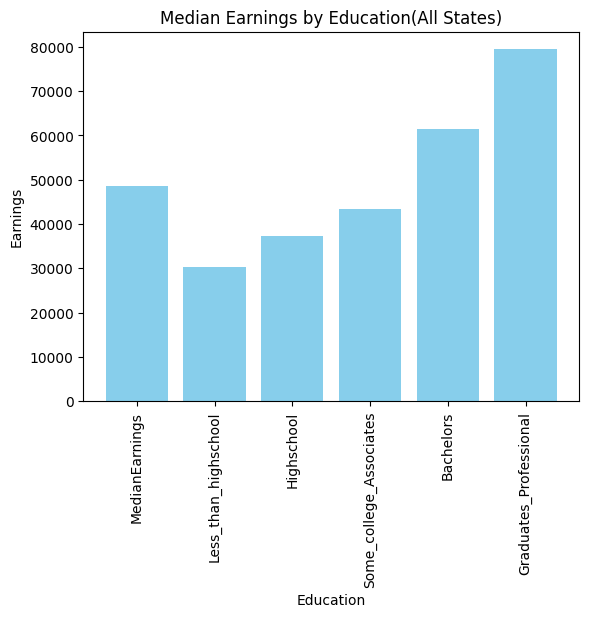

In [27]:
#Create bar plot to compare national median earnings at different education levels
earnings_edu.set_index('State', inplace=True)
earnings_avgs=earnings_edu.mean()
y=list(earnings_avgs)
x=list(earnings_avgs.index)
plt.bar(x,y,width=.8,color='skyblue')
plt.xticks(rotation=90)
plt.ylabel('Earnings')
plt.xlabel('Education')
plt.title('Median Earnings by Education(All States)')
plt.show()

,MedianEarnings,Less_than_highschool,Highschool,Some_college_Associates,Bachelors,Graduates_Professional
MedianEarnings,1.000000,0.589714,0.704804,0.822202,0.923847,0.904837
Less_than_highschool,0.589714,1.000000,0.894914,0.830200,0.553113,0.514035
Highschool,0.704804,0.894914,1.000000,0.938268,0.714186,0.659854
Some_college_Associates,0.822202,0.830200,0.938268,1.000000,0.849385,0.801803
Bachelors,0.923847,0.553113,0.714186,0.849385,1.000000,0.963456
Graduates_Professional,0.904837,0.514035,0.659854,0.801803,0.963456,1.000000


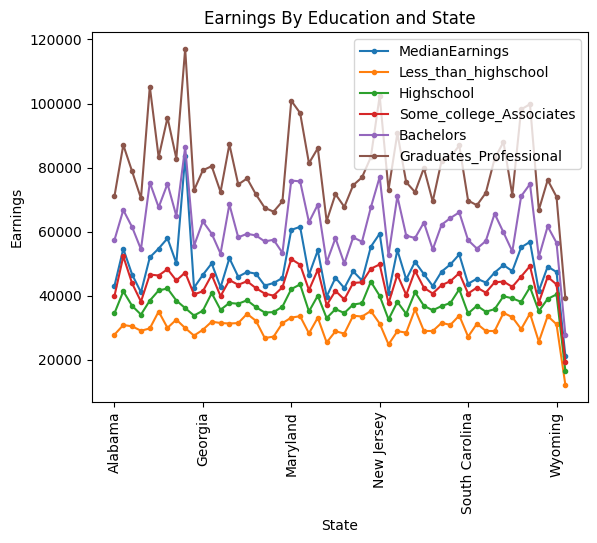

In [ ]:
#Create line plot to compare earnings at different education levels between states
earnings_edu.plot(style='.-',ylabel='Earnings',rot=90,title='Earnings By Education and State')
earnings_edu.corr()

### **Combined(Institution-Level)**

In [ ]:
#Reformat earnings dataframe to prepare for merge
earnings_edu.reset_index()
earnings_edu=earnings_edu.rename(columns={'State':'state'})
earnings_edu['state']=['AL','AK','AZ','AR','CA','CO','CT','DE','DC','FL','GA','HI',
'ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE',
'NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX',
'UT','VT','VA','WA','WV','WI','WY','PR']
merged=pd.merge(data,earnings_edu,on='state')
#Calculate new column comparing institution earnings to state Bachelors earnings
merged['earnings_diff']=merged['earnings']-merged['Bachelors']
merged=merged.dropna()
merged[['name','state','earnings','Bachelors','earnings_diff']].sort_values(by='earnings_diff',ascending=False)

,name,state,earnings,Bachelors,earnings_diff
797,University of Health Sciences and Pharmacy in ...,MO,139346.0,57944,81402.0
109,Harvey Mudd College,CA,117259.0,75306,41953.0
1236,Carnegie Mellon University,PA,105185.0,64219,40966.0
1306,University of Pennsylvania,PA,100577.0,64219,36358.0
1687,Stanford University,CA,109840.0,75306,34534.0
...,...,...,...,...,...
1719,Soka University of America,CA,38602.0,75306,-36704.0
589,St. John's College,MD,37249.0,75924,-38675.0
1577,The Evergreen State College,WA,35669.0,74844,-39175.0
1863,John Paul the Great Catholic University,CA,34240.0,75306,-41066.0


In [ ]:
#Identify correlations between variables and earnings difference
numeric_vars2 = merged[['earnings_diff','earnings','average_act','graduation_rate','student_pop','acceptance_rate','yearly_cost','average_income']]
correlations2 = numeric_vars2.corr()
correlations2.loc['earnings_diff'].sort_values(ascending=False)

,earnings_diff
earnings_diff,1.000000
earnings,0.834622
average_act,0.425048
graduation_rate,0.408408
average_income,0.321494
yearly_cost,0.245225
student_pop,0.204584
acceptance_rate,-0.325741


In [ ]:
#Calculate new column comparing post-graduation earnings to cost of attendance by institution (return on investment)
data['ROI_diff']=data['earnings']-data['yearly_cost']
filtered_data=data[['name','earnings','state','yearly_cost','ROI_diff']]
filtered_data=filtered_data.dropna()
filtered_data.sort_values(by='ROI_diff',ascending=False)

,name,earnings,state,yearly_cost,ROI_diff
1027,United States Merchant Marine Academy,97773.0,NY,9380.0,88393.0
797,University of Health Sciences and Pharmacy in ...,139346.0,MO,52232.0,87114.0
1017,SUNY Maritime College,91351.0,NY,28019.0,63332.0
288,Georgia Institute of Technology-Main Campus,91543.0,GA,29148.0,62395.0
787,Missouri University of Science and Technology,80790.0,MO,24736.0,56054.0
...,...,...,...,...,...
1030,Vassar College,49885.0,NY,80784.0,-30899.0
1135,Kenyon College,44382.0,OH,80270.0,-35888.0
1032,School of Visual Arts,35939.0,NY,72488.0,-36549.0
986,Sarah Lawrence College,38798.0,NY,76703.0,-37905.0


In [ ]:
#Identify correlations between return on investment and other variables
numeric = data.select_dtypes(include=['float64','int64']).drop(['region','id','debt','precent_female','percent_loans','pell_grant'],axis=1)
correlations = numeric.corr()
correlations.loc['ROI_diff'].sort_values(ascending=False)

,ROI_diff
ROI_diff,1.000000
stud_fac_ratio,0.504205
part_time,0.454715
student_pop,0.411810
earnings,0.270257
acceptance_rate,0.219887
graduation_rate,-0.216312
average_act,-0.229038
average_income,-0.320571
yearly_cost,-0.753877
